In [1]:
import tensorflow as tf

print(tf.__version__)

2.18.0


In [16]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [4]:
data = load_breast_cancer()
type(data)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
for key in data.keys():
    print('Key: ', key)
    print('Type: ', type(data[key]))
    print('Data: ')
    print(data[key])
    print('------------------------------------------------')
    print('------------------------------------------------')
    print('------------------------------------------------')

Key:  data
Type:  <class 'numpy.ndarray'>
Data: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
------------------------------------------------
------------------------------------------------
------------------------------------------------
Key:  target
Type:  <class 'numpy.ndarray'>
Data: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = data.data.shape
print(N, D)

569 30


In [12]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(np.min(np.min(X_train)), np.max(np.max(X_train)))

-3.009144737671028 11.119213562320049


In [22]:
from keras import models, layers

In [23]:
model = models.Sequential([
    layers.Input(shape=(D,)),
    layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3224 - loss: 1.0795 - val_accuracy: 0.4734 - val_loss: 0.8505
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4493 - loss: 0.9111 - val_accuracy: 0.5319 - val_loss: 0.7735
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4882 - loss: 0.8729 - val_accuracy: 0.5798 - val_loss: 0.7050
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5660 - loss: 0.7762 - val_accuracy: 0.6330 - val_loss: 0.6439
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6060 - loss: 0.7141 - val_accuracy: 0.6702 - val_loss: 0.5916
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6680 - loss: 0.6270 - val_accuracy: 0.6968 - val_loss: 0.5452
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7163 - loss: 0.5775 - val_accuracy: 0.7606 - val_loss: 0.5050
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7333 - loss: 0.5564 - val_accuracy: 0.7926 - 

In [29]:
import matplotlib.pyplot as plt

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


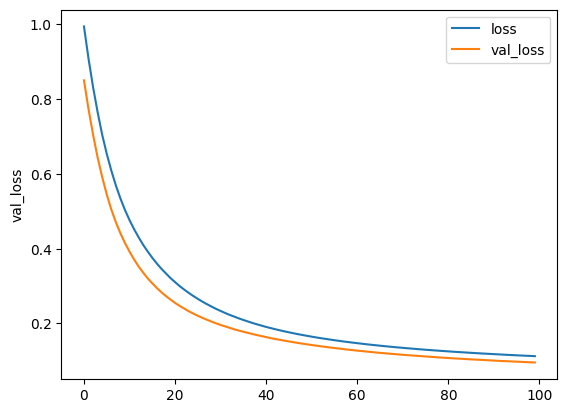

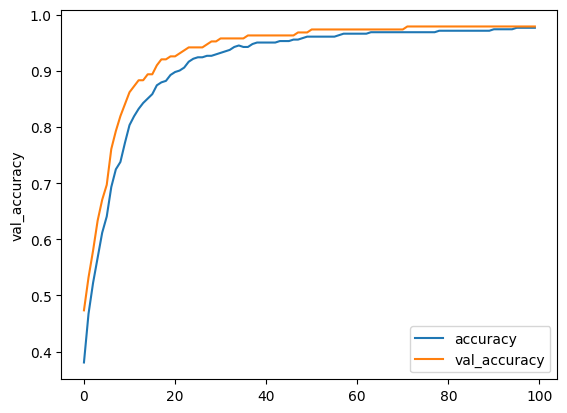

In [38]:
print(r.history.keys())
plt.plot(r.history['loss'], label='loss')
plt.ylabel('loss')
# plt.show()
plt.plot(r.history['val_loss'], label='val_loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='accuracy')
plt.ylabel('accuracy')
# plt.show()
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

In [35]:
print(model.evaluate(X_train, y_train, verbose=False))
print(model.evaluate(X_test, y_test, verbose=False))

[0.11207102239131927, 0.9763779640197754]
[0.09548911452293396, 0.978723406791687]
